### **Customer Type and Behaviour Analysis on Advertisement**

*our mission:*
* sebuah perusahaan yang bergerak di bidang digital marketing ingin mengetahui pola dari customer saat menggunakan internet.
* apakah durasi customer saat berada dalam sebuah website akan berpengaruh pada marketing perusahaan tersebut.
* interval umur yang dapat menjadi target marketing.



***Dataset columns detail***

|   Feature |   Description |   Type    |
|-----------|---------------|-----------|
| Unnamed : 0    | ID Customer   | Numeric |
| Daily Time Spent on a Site    | Time spent by the user on a site in minutes| Numeric  |
| Age   | Customer' age in terms of years   | Numeric   |
| Area Income   | Average income of geographical area of costumer   | Numeric   |
| Daily Internet Usage  | Average minutes in a day customer ii on the internet  | Numeric   |
| Male  | Whether or not a customer was male    | Categorical   |
| Timestamp | Time which costumer clicked ads or closed window  | Categorical   |
| Clicked on Ad | Yes or No the customer clicked the ads    | Target Variable   |
| city  | City of the customer  | Categorical   |
| province  | Province of the customer  | Categorical   |
| category  | Category of ads   | Categorical   |



## ***Customer Type and Behaviour Analysis on Advertisement***

### **Exploratory Data Analysis (EDA)**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#showing all the columns
pd.pandas.set_option('display.max_columns', None)

In [3]:
# load dataset
df = pd.read_csv('clicked_ads_dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


### ***Univariate Analysis***

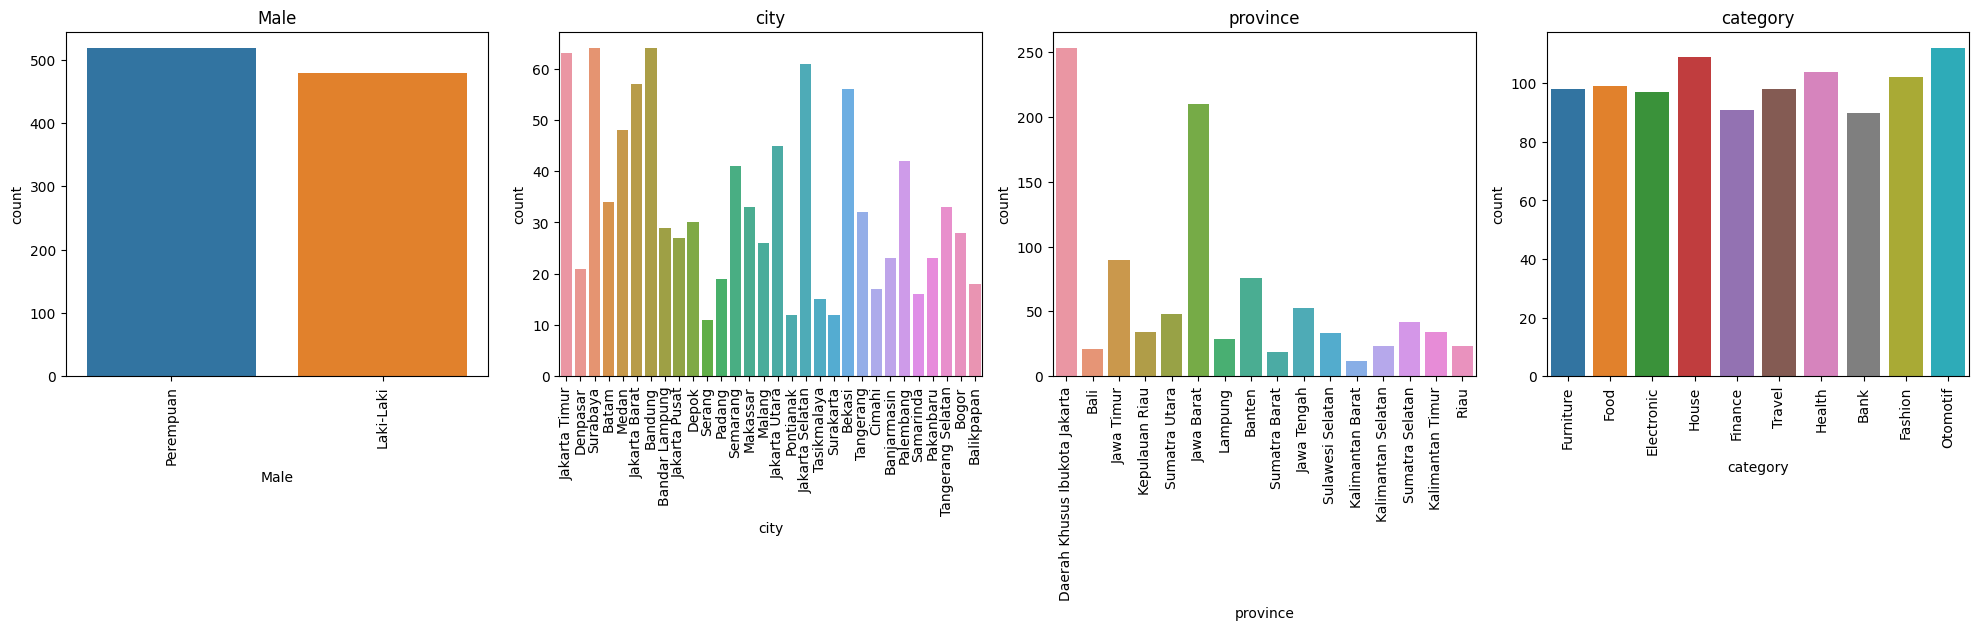

In [8]:
# let's show categorical features univariate visualization

cat = df[['Male','city','province','category']]

plt.figure(figsize=(20,10))
for i in range(len(cat.columns)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=cat.columns[i], data=df)
    plt.title(cat.columns[i])
    plt.tight_layout()
    plt.xticks(rotation=90)
    

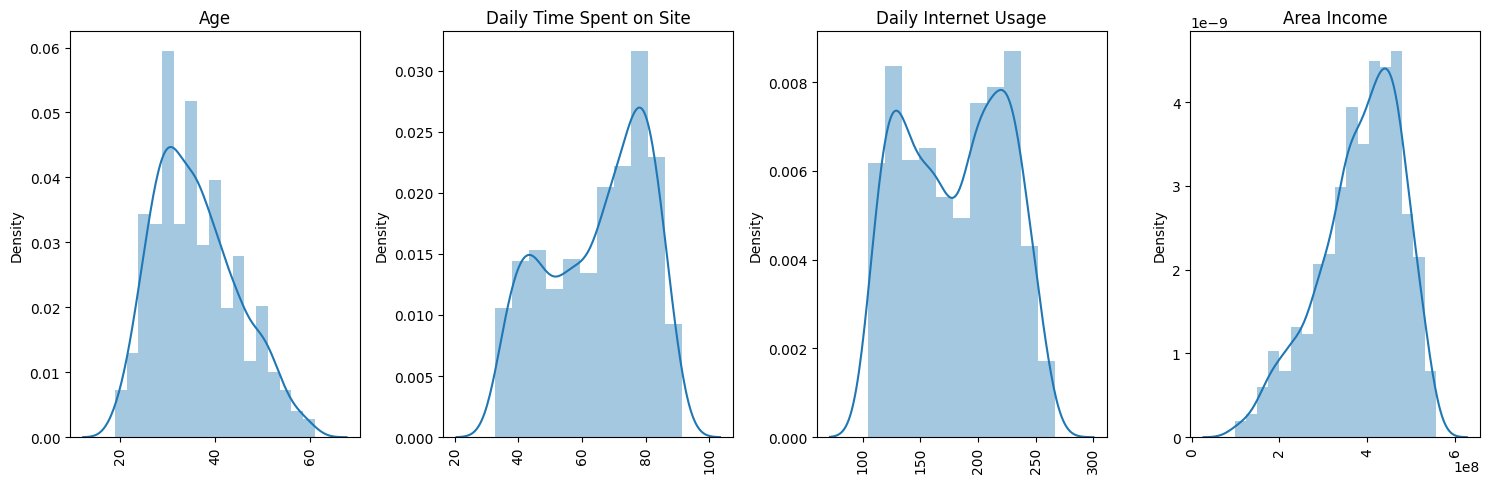

In [9]:
num = ['Age','Daily Time Spent on Site','Daily Internet Usage','Area Income']

#show num unvariate visualization using histogram
plt.figure(figsize=(15,5))
for i in range(0,len(num)):
    plt.subplot(1,4,i+1)
    sns.distplot(x=df[num[i]])
    plt.title(num[i])
    plt.tight_layout()
    plt.xticks(rotation=90)

***Univariate Observasion***
* On `Age` column, there are more `Perempuan` value than `Laki-laki`
* The most data came from `Jakarta` and `Jawa Barat` province
* `Age`,`Daily Time Spent on Site` and `Area Income` columns have skewed data distribution

### ***Bivariate Analysis***

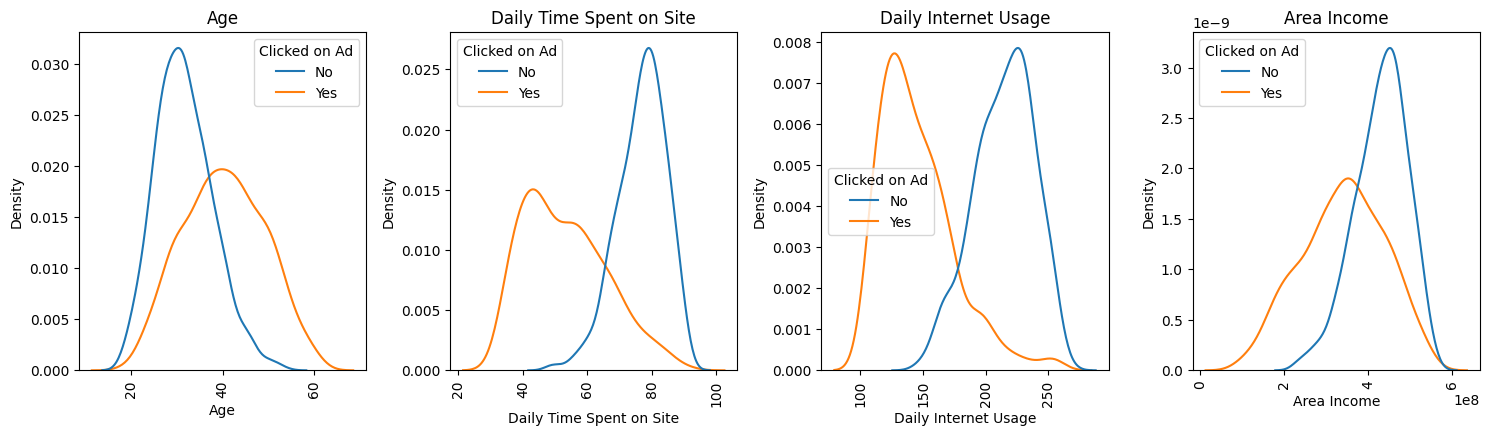

In [10]:

plt.figure(figsize=(15,8))
for i in range(0,len(num)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(x=df[num[i]], data=df,hue=df['Clicked on Ad'])
    plt.title(num[i])
    plt.tight_layout()
    plt.xticks(rotation=90)

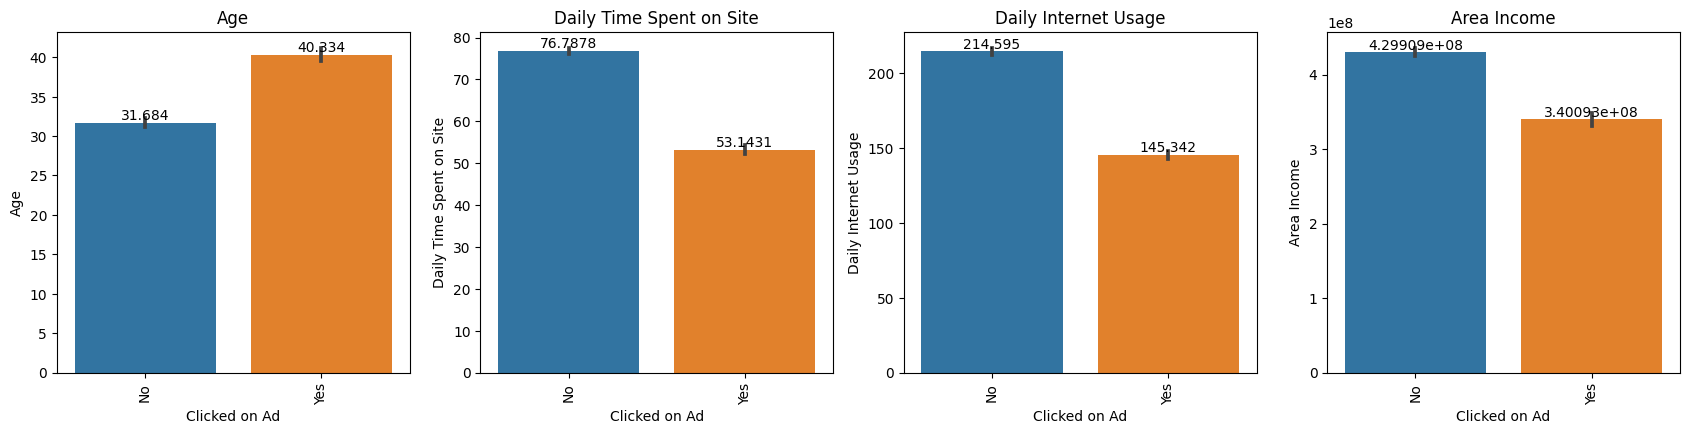

In [11]:
#let show bar plot for num features
plt.figure(figsize=(17,8))
for i in range(0,len(num)):
    plt.subplot(2,4,i+1)
    ax=sns.barplot(y=df[num[i]], x=df['Clicked on Ad'], data=df)
    plt.title(num[i])
    plt.tight_layout()
    plt.bar_label(ax.containers[0])

    plt.xticks(rotation=90)


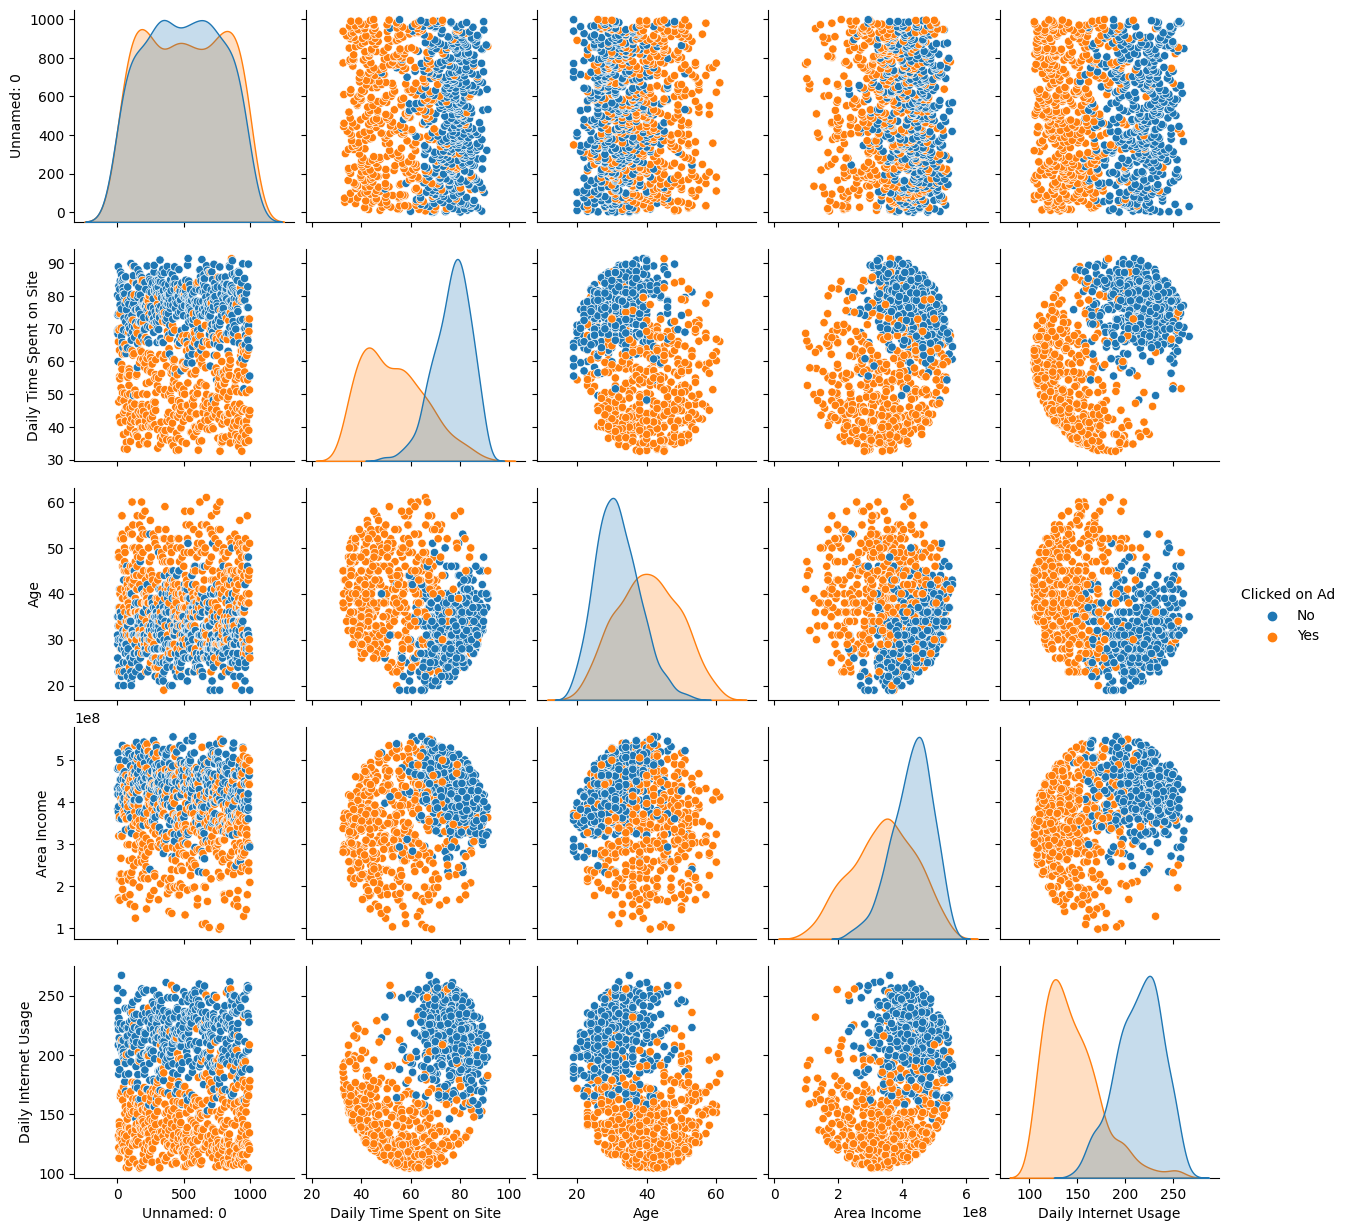

In [12]:
#let show bivariate analysis using pairplot
sns.pairplot(df, hue='Clicked on Ad')


*Bivariate Observation*

* Mostly customers have clicked the ads, their age more than 40 years old, and spent time on our site is 53 minutes a day.
* The customers have clicked the ads, they are on 3,4 income area
* Youngest Customers which high daily internet usage, prefer not to click the ads
* Most customers which more spent time on our site and little daily internet usage, they are click the ads.


### **Multivariate Analysis**

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Daily Time Spent on Site'),
  Text(2.5, 0, 'Daily Internet Usage'),
  Text(3.5, 0, 'Area Income')])

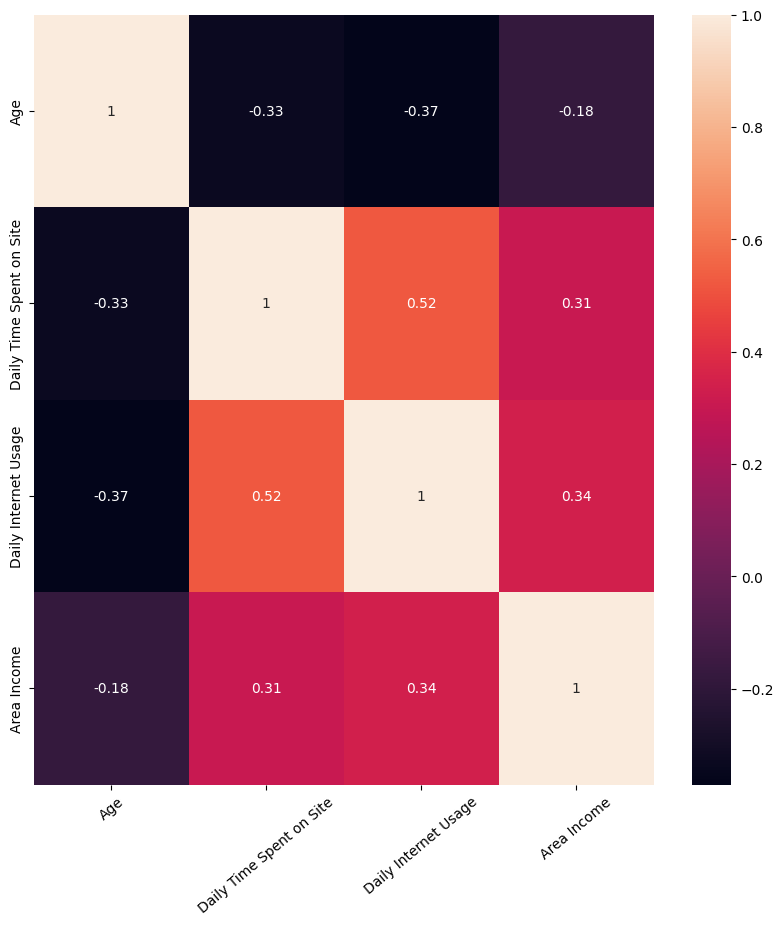

In [13]:
# let's show multivariate analysis using correlation matrix
corr = df[num].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.xticks(rotation=40)

*Multivariate Analysis*
* `Daily Time Spent on Site` and `Daily Internet Usage` column have high correlation.
* Between `Age` column with `Daily Internet Usage`,`Daily Time Spent on Site`,`Area Income` has small negative correlation.

### **Data Preprocessing**

In [14]:
df_prep = df.copy()

In [15]:
df_prep.drop(['Unnamed: 0'], axis=1, inplace=True)

In [16]:
categorical = df_prep.select_dtypes(include=['object']).columns
numerical = df_prep.select_dtypes(exclude=['object']).columns

In [17]:
#fill numeric missing values with mean
df_prep[numerical] = df_prep[numerical].fillna(df_prep[numerical].mean())

In [18]:
# fill categorical missing values with mode
df_prep[categorical] = df_prep[categorical].fillna(df_prep[categorical].mode().iloc[0])

In [19]:
#convert Timestamp to datetime
df_prep['Timestamp'] = pd.to_datetime(df_prep['Timestamp'])

In [20]:
df_prep['year'] = df_prep['Timestamp'].dt.year
df_prep['month'] = df_prep['Timestamp'].dt.month
df_prep['weekday'] = df_prep['Timestamp'].dt.isocalendar().week
df_prep['day'] = df_prep['Timestamp'].dt.day

***Feature Encoding***

In [21]:
#lets encode Male column
df_prep['Male'] = df_prep['Male'].map({'Laki-Laki':1, 'Perempuan':0})

#lets encode Clicked on Ad column
df_prep['Clicked on Ad'] = df_prep['Clicked on Ad'].map({'Yes':1, 'No':0})


In [23]:
# lets encode  Age column

age_group = []
for i in df_prep['Age']:
    if i < 30:
        age_group.append(0)
    elif i >= 30 and i < 45:
        age_group.append(1)
    else:
        age_group.append(2)
    
df_prep['Age'] = age_group


In [29]:
df_prep.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,month,weekday
398,76.24,1,528673460.0,198.32,1,0,Makassar,Sulawesi Selatan,Bank,5,22
484,46.20,1,359207660.0,119.30,0,1,Bogor,Jawa Barat,House,4,13
668,52.56,1,232030330.0,250.36,1,1,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Finance,4,16
708,46.89,2,507877580.0,176.78,1,1,Depok,Jawa Barat,Furniture,7,28
961,78.67,0,443239930.0,195.56,0,0,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Fashion,2,7


In [24]:
df_prep.drop(['Timestamp','year','day'], axis=1, inplace=True)

***Feature Transformation***

In [25]:
#lets scalerize the data

df_feat = df_prep.copy()
feat = ['Daily Time Spent on Site','Daily Internet Usage','Area Income','weekday']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_feat[feat] = scaler.fit_transform(df_feat[feat])

In [26]:
df_feat = df_feat[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'city', 'province',
       'category', 'month', 'weekday', 'Clicked on Ad']].copy()

<Axes: >

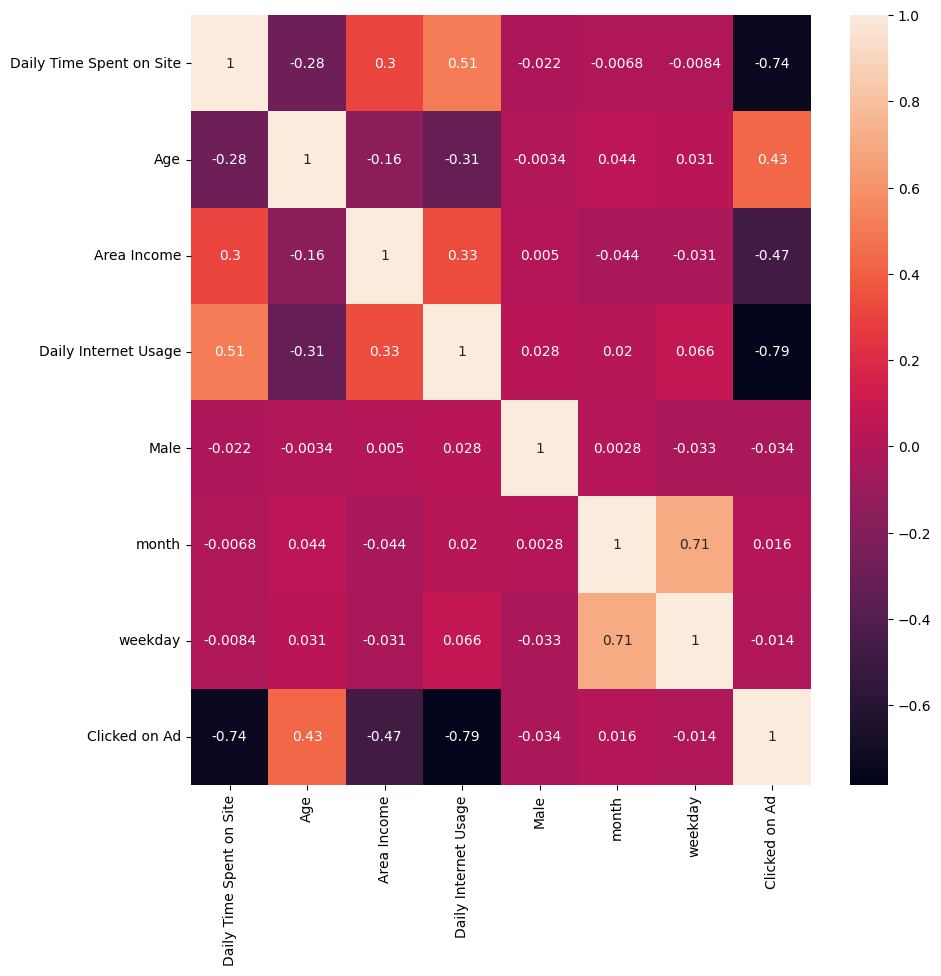

In [27]:
#lets show correlation between numerical features
corr = df_feat[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male','month', 'weekday', 'Clicked on Ad']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)


In [28]:
# split feature and target

y = df_feat['Clicked on Ad']
X = df_feat.drop(['Clicked on Ad'], axis=1)